In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import sklearn

from sklearn.decomposition import PCA

from sklearn.cluster import MiniBatchKMeans

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

In [3]:
#Import data
train_df = pd.read_csv('digittrain-2.csv')
test_df = pd.read_csv('digittest.csv')


In [4]:
num_rows = train_df.shape[0]
print(num_rows)

42000


# EDA

In [5]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [8]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
train_df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [11]:
train_df.shape

(42000, 785)

In [12]:
test_df.shape

(28000, 784)

In [15]:
#Check for null although shouldnt be any...
columns_with_null = train_df.columns[train_df.isnull().any()]
null_values = train_df[columns_with_null].isnull().sum()

print("Columns with null values:")
print(null_values)

Columns with null values:
Series([], dtype: float64)


# Modeling

In [16]:
X_train = train_df.drop(labels = ["label"],axis = 1) 
y_train = train_df["label"]

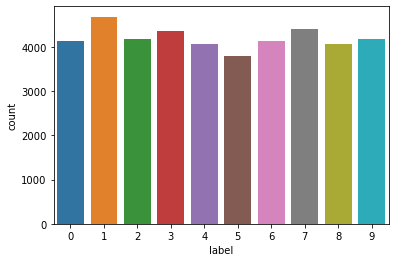

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [18]:
sns.countplot(x = y_train)
plt.show()


print(y_train.value_counts())

### Initial Random Forrest classifier 

In [19]:
initialrf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=64, n_jobs=-1, criterion="gini") 

start = datetime.now()
initialrf.fit(X_train, y_train)
end = datetime.now()

print("Time taken for training:", end - start)

Time taken for training: 0:00:08.454453


In [20]:
y_pred_rf = initialrf.predict(test_df)
y_pred_rf = pd.Series(y_pred_rf, name="Label")

In [22]:
submission = pd.concat([pd.Series(range(1, len(test_df) + 1), name="ImageId"), y_pred_rf], axis=1)
submission.to_csv("initialrf.csv", index=False)

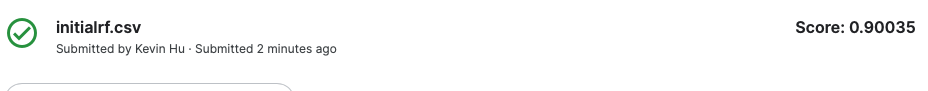

## PCA

In [27]:
# Combine the X_train and test_df data
combined_data = pd.concat([X_train, test_df])

In [28]:
# PCA 
start = datetime.now()

pca = PCA(n_components=0.95)
pca.fit(combined_data)

end = datetime.now()
print("Time taken for PCA:", end - start)

Time taken for PCA: 0:00:06.031481


In [29]:
X_train_pca = pca.transform(X_train)
test_df_pca = pca.transform(test_df)

## Random Forest after PCA

In [31]:
rf_pca = RandomForestClassifier(n_estimators=500, max_leaf_nodes=64, n_jobs=-1, criterion="gini")

start = datetime.now() 

rf_pca.fit(X_train_pca, y_train)

end = datetime.now()

print("Time taken to fit model with PCA:", end - start)

Time taken to fit model with PCA: 0:00:32.297533


In [33]:
# Make prediction on test set
y_pred_rf_pca = rf_pca.predict(test_df_pca)
y_pred_rf_pca = pd.Series(y_pred_rf_pca, name="Label")

In [34]:
# Submission file
submission_pca = pd.concat([pd.Series(range(1, len(test_df) + 1), name="ImageId"), y_pred_rf_pca], axis=1)
submission_pca.to_csv("rf_pca.csv", index=False)

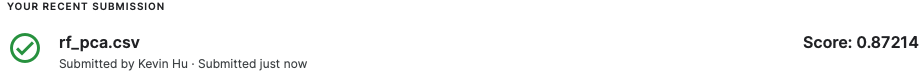

## K-Means Clustering

In [42]:
# Assigning labels adapted from the example
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}
    for i in range(kmeans.n_clusters):
        labels = []
        index = np.where(kmeans.labels_ == i)
        labels.append(actual_labels[index[0]])  # Access the 0th element to avoid tuple indexing issue
        labels = np.concatenate(labels)  # Concatenate the labels
        counts = np.bincount(labels)
        inferred_labels[np.argmax(counts)] = i
    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster == value:  # Check equality instead of in list
                predicted_labels[i] = key
    return predicted_labels

# There are 10 digits (0 - 9)
n_digits = 10

# From the example
kmeans = MiniBatchKMeans(n_clusters = n_digits)

start = datetime.now() 
kmeans.fit(X_train)
end = datetime.now()

print("Time taken to fit model with PCA:", end - start)

cluster_labels = infer_cluster_labels(kmeans, y_train)

/Users/kevhhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Time taken to fit model with PCA: 0:00:00.832493


In [43]:
test_clusters = kmeans.predict(test_df)
predicted_labels = infer_data_labels(test_clusters, cluster_labels)

In [44]:
submission_kmeans = pd.DataFrame({'ImageId': range(1, len(test_df) + 1), 'Label': predicted_labels})
submission_kmeans.to_csv("kmeans1.csv", index=False)

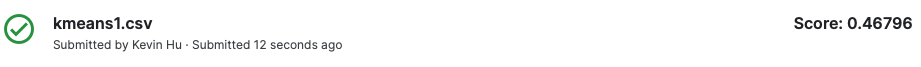

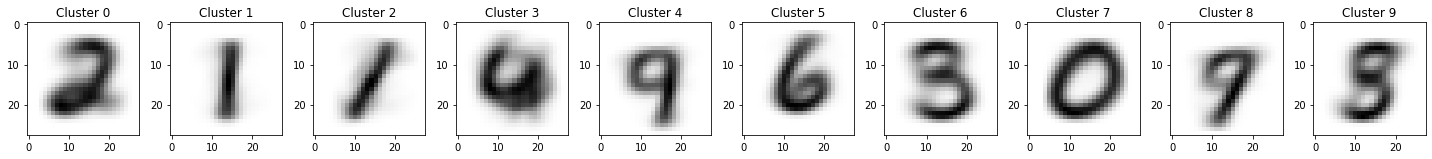

In [47]:
#Visualize the Cluster centers
cluster_centers = kmeans.cluster_centers_

fig, ax = plt.subplots(1, n_digits, figsize=(20, 5)) 

for i in range(n_digits):
    center = cluster_centers[i]
    image = center.reshape(28, 28) 
    ax[i].imshow(image, cmap='binary')
    ax[i].set_title(f'Cluster {i}') 

plt.tight_layout()
plt.show()

The cluster centers do not appear distinctly clear likely due to the poor accuracy of the k-means clustering. 

## K-Means Clustering 2

In [59]:
param_grid = {
    'n_clusters': [8, 10, 12, 14, 18, 20, 50, 100],
    'batch_size': [100, 200, 300],
    'max_iter': [100, 200, 300]
}

kmeans = MiniBatchKMeans(random_state=42) 

# GridSearchCV
grid_search = GridSearchCV(kmeans, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fitting the model
start = datetime.now()
grid_search.fit(X_train)
end = datetime.now()
print("Time taken for GridSearch:", end - start)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

/Users/kevhhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/Users/kevhhu/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Time taken for GridSearch: 0:00:56.166128


In [60]:
test_clusters = best_estimator.predict(test_df)
cluster_labels = infer_cluster_labels(best_estimator, y_train)
predicted_labels = infer_data_labels(test_clusters, cluster_labels)

In [61]:
submission_kmeans = pd.DataFrame({'ImageId': range(1, len(test_df) + 1), 'Label': predicted_labels})
submission_kmeans.to_csv("kmeans_gridsearch.csv", index=False)

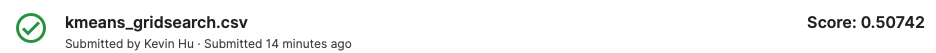

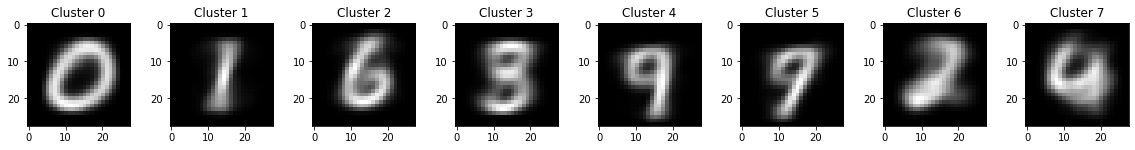

In [62]:
cluster_centers = best_estimator.cluster_centers_

num_clusters = len(cluster_centers)
fig, ax = plt.subplots(1, num_clusters, figsize=(num_clusters * 2, 2))

for i in range(num_clusters):
    center = cluster_centers[i]
    image = center.reshape(28, 28)  
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()

# Fixed Experiment

### PCA Random Forrest

In [49]:
#PCA on training set
pca = PCA(n_components=0.95)

start = datetime.now()
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
end = datetime.now()

print("Time taken for PCA on training set:", end - start)

Time taken for PCA on training set: 0:00:04.130062


In [50]:
# PCA transformation of test set
test_df_pca = pca.transform(test_df)

# Random Forest with PCA on training set
rf_pca = RandomForestClassifier(n_estimators=500, max_leaf_nodes=64, n_jobs=-1, criterion="gini")

start = datetime.now()
rf_pca.fit(X_train_pca, y_train)
end = datetime.now()

print("Time taken to fit model with PCA on training set:", end - start)

Time taken to fit model with PCA on training set: 0:00:32.394682


In [51]:
y_pred_rf_pca = rf_pca.predict(test_df_pca)
y_pred_rf_pca = pd.Series(y_pred_rf_pca, name="Label")

In [52]:
submission_pca = pd.concat([pd.Series(range(1, len(test_df) + 1), name="ImageId"), y_pred_rf_pca], axis=1)
submission_pca.to_csv("rf_pca_fixed.csv", index=False)

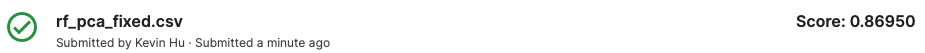

### Testing Parameters using Pipeline

In [65]:
pipe = Pipeline([
    ('pca', PCA()),
    ('rf', RandomForestClassifier())
])

param_grid = {
    'pca__n_components': [5, 7, 8, 9, 11, 13, 15],  
    'rf__n_estimators': [100, 200, 300],  
    'rf__max_depth': [None, 10, 20],  
    'rf__max_features': ['auto', 'sqrt', 'log2'],  
    'rf__bootstrap': [True, False],  
    'rf__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy')  

Time taken for GridSearch: 0:00:00.000840


In [ ]:
start2 = datetime.now()
grid_search.fit(X_train, y_train)
end2 = datetime.now()
print("Time taken to fit model:", end2 - start2)

In [ ]:
best_params = grid_search.best_params_

print("Best parameters:", best_params)

In [ ]:
#Predict on test
y_pred = best_estimator.predict(test_df)


In [ ]:
#Kaggle
submission = pd.DataFrame({
    'ImageId': range(1, len(test_df) + 1),
    'Label': y_pred
})

submission.to_csv('submission.csv', index=False)